# Домашнее задание "Однофакторный дисперсионный анализ (ANOVA)"

**Инструкции:**
- Скачайте этот файл и заполните ячейки с кодом и текстовыми выводами.
- В каждой задаче требуется:
  1) короткая формулировка метода и обоснование,
  2) код/расчёты,
  3) результаты (статистика, p-value, CI),
  4) содержательный вывод.
- Используйте `scipy`, `statsmodels`, `pingouin` или `scikit-posthocs` по желанию. При нарушении допущений объясните, какие альтернативы применили.

Формат сдачи: `.ipynb` с заполненными ячейками и выводами.

In [53]:
# дополняйте ячейку любыми импортами по желанию!
import numpy as np
import pandas as pd
import scipy.stats as st

### Задание 1. Сопоставление статистик

Вам предложены описания ситуаций и статистических процедур. Для каждой ситуации укажите наилучшую применимую статистику из списка: `z-test`, `t-test`, `Welch t-test`, `F-test` (сравнение дисперсий), `χ^2` (goodness-of-fit), `ANOVA (one-way)`, `Tukey HSD`, `Levene`.

Ситуации:
1) Необходимо проверить, отличается ли средний объём дозы от заданного значения, известна дисперсия производства (укажите двусторонний/односторонний тест).
2) Сравнить средние двух независимых групп при неизвестных, но равных дисперсиях.
3) Сравнить средние двух независимых групп при неизвестных и неравных дисперсиях.
4) Оценить, одинаковы ли средние в трёх и более группах.
5) Проверить, согласуются ли наблюдаемые частоты с распределением Пуассона.

**Требуется:** кратко объясните выбор для каждой ситуации (1—2 предложения).


## Решение Задания 1

**1) Проверить, отличается ли средний объём дозы от заданного значения, известна дисперсия производства**

**Статистика: z-test (двусторонний)**

**Обоснование:** Так как дисперсия известна (σ известно), используется z-тест. Двусторонний тест, так как проверяем наличие отличия в любую сторону (μ ≠ μ₀).

**2) Сравнить средние двух независимых групп при неизвестных, но равных дисперсиях**

**Статистика: t-test (pooled t-test)**

**Обоснование:** Дисперсии неизвестны, но равны, поэтому используется объединённая оценка дисперсии (pooled variance) в классическом t-тесте для независимых выборок.

**3) Сравнить средние двух независимых групп при неизвестных и неравных дисперсиях**

**Статистика: Welch t-test**

**Обоснование:** Дисперсии неизвестны и неравны, поэтому классический t-тест неприменим. Welch t-test не требует предположения о равенстве дисперсий и используется для корректной проверки равенства средних.

**4) Оценить, одинаковы ли средние в трёх и более группах**

**Статистика: ANOVA (one-way) или Welch ANOVA**

**Обоснование:** При сравнении средних трёх и более независимых групп используется ANOVA. Классическая ANOVA применяется при гомоскедастичности, Welch ANOVA — при её нарушении.

**5) Проверить, согласуются ли наблюдаемые частоты с распределением Пуассона**

**Статистика: χ² (goodness-of-fit)**

**Обоснование:** Это задача на проверку согласия наблюдаемого распределения частот с теоретическим (Пуассоном). Тест χ² goodness-of-fit сравнивает наблюдаемые и ожидаемые частоты.

---


### Задание 2. Тест для дозатора (z-test, двусторонний)

Инженерная задача. Дозатор рассчитывает среднюю дозу 3.00 г. Получено $n=50$ измерений со средним $\overline X=3.005$ и известным стандартным отклонением процесса $\sigma=0.015$.

а) Проведите двусторонний z-тест для проверки $H_0:\,\mu=3.00$ при $\alpha=0.05$.

б) Постройте 95% доверительный интервал для $\mu$.

в) Сделайте практический вывод для инженера: нужно ли перенастраивать дозатор?

**Требуется:** формулы расчёта, численные значения (z_obs, p-value, CI), вывод.


In [54]:
mu0 = 3.00
xbar = 3.005
sigma = 0.015
n = 50
alpha = 0.05

# Расчёт z-статистики
z_obs = (xbar - mu0) / (sigma / np.sqrt(n))

# p-value для двустороннего теста
p_value = 2 * (1 - st.norm.cdf(abs(z_obs)))

# Критическое значение z для alpha = 0.05 (двусторонний)
z_crit = st.norm.ppf(1 - alpha / 2)

# Доверительный интервал 95% для му
margin_of_error = z_crit * (sigma / np.sqrt(n))
ci_lower = xbar - margin_of_error
ci_upper = xbar + margin_of_error

# Вывод результатов
print(f"\nИсходные данные:")
print(f"  Гипотезированное значение (μ₀): {mu0} г")
print(f"  Выборочное среднее (x̄): {xbar} г")
print(f"  Известное стандартное отклонение (σ): {sigma} г")
print(f"  Размер выборки (n): {n}")
print(f"  Уровень значимости (alpha): {alpha}")

print(f"\nРасчёты:")
print(f"  z-статистика: z_obs = (x̄ - μ₀) / (σ/√n)")
print(f"               z_obs = ({xbar} - {mu0}) / ({sigma}/√{n})")
print(f"               z_obs = {xbar - mu0} / {sigma / np.sqrt(n):.6f}")
print(f"               z_obs = {z_obs:.4f}")

print(f"\n  Критическое значение (двусторонний): z_crit = ±{z_crit:.4f}")
print(f"  p-value (двусторонний): {p_value:.6f}")

print(f"\n95% Доверительный интервал для μ:")
print(f"  CI = x̄ ± z(1-alpha/2) * (σ/√n)")
print(f"  CI = {xbar} ± {z_crit:.4f} * {sigma / np.sqrt(n):.6f}")
print(f"  CI = {xbar} ± {margin_of_error:.6f}")
print(f"  CI = [{ci_lower:.6f}, {ci_upper:.6f}]")

print(f"\nВывод статистического теста:")
if abs(z_obs) > z_crit:
    print(f"  |z_obs| = {abs(z_obs):.4f} > z_crit = {z_crit:.4f} → Отвергаем H₀")
    print(f"  p-value = {p_value:.6f} < alpha = {alpha} → Отвергаем H₀")
else:
    print(f"  |z_obs| = {abs(z_obs):.4f} < z_crit = {z_crit:.4f} → Не отвергаем H₀")
    print(f"  p-value = {p_value:.6f} > alpha = {alpha} → Не отвергаем H₀")



Исходные данные:
  Гипотезированное значение (μ₀): 3.0 г
  Выборочное среднее (x̄): 3.005 г
  Известное стандартное отклонение (σ): 0.015 г
  Размер выборки (n): 50
  Уровень значимости (alpha): 0.05

Расчёты:
  z-статистика: z_obs = (x̄ - μ₀) / (σ/√n)
               z_obs = (3.005 - 3.0) / (0.015/√50)
               z_obs = 0.004999999999999893 / 0.002121
               z_obs = 2.3570

  Критическое значение (двусторонний): z_crit = ±1.9600
  p-value (двусторонний): 0.018422

95% Доверительный интервал для μ:
  CI = x̄ ± z(1-alpha/2) * (σ/√n)
  CI = 3.005 ± 1.9600 * 0.002121
  CI = 3.005 ± 0.004158
  CI = [3.000842, 3.009158]

Вывод статистического теста:
  |z_obs| = 2.3570 > z_crit = 1.9600 → Отвергаем H₀
  p-value = 0.018422 < alpha = 0.05 → Отвергаем H₀


## Ответы и выводы для Задания 2

### а) Двусторонний z-тест

**Гипотезы:**
- $H_0: \mu = 3.00$ г (дозатор работает корректно)
- $H_1: \mu \neq 3.00$ г (дозатор отклоняется от целевого значения)

**Формула z-статистики:**
$$z_{\text{obs}} = \frac{\overline{X} - \mu_0}{\sigma/\sqrt{n}} = \frac{3.005 - 3.00}{0.015/\sqrt{50}} = \frac{0.005}{0.002121} \approx 2.357$$

**Критическое значение** при $\alpha = 0.05$ (двусторонний): $z_{\text{crit}} = \pm 1.96$

**p-value**: Для двустороннего теста $p = 2 \cdot P(Z > |z_{\text{obs}}|) \approx 0.0185$

**Вывод теста:** Так как $|z_{\text{obs}}| = 2.357 > 1.96$ и $p\text{-value} = 0.0185 < 0.05$, **отвергаем $H_0$** на уровне $\alpha = 0.05$.

### б) 95% доверительный интервал для $\mu$

$$\text{CI} = \overline{X} \pm z_{1-\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} = 3.005 \pm 1.96 \cdot \frac{0.015}{\sqrt{50}}$$
$$\text{CI} = 3.005 \pm 1.96 \cdot 0.002121 = 3.005 \pm 0.00416$$
$$\text{CI} = [3.0009, 3.0091]$$

Целевое значение $\mu_0 = 3.00$ находится **вне** доверительного интервала (границы начинаются с 3.0009).

### в) Практический вывод

**Статистически значимое отклонение**: Дозатор систематически завышает дозу на ~0.005 г (в среднем). Это отклонение статистически значимо при $\alpha = 0.05$.

**Практическая значимость**: Разница в 0.005 г составляет **0.167% от целевого значения 3.00 г**, что может быть:
- **Критичным**, если допуск на дозу очень строгий (например, 0.01 г)
- **Незначительным**, если допуск более мягкий

**Рекомендация**: **Требуется перенастройка дозатора** для центрирования на целевое значение 3.00 г, так как систематическое смещение подтверждено статистически. Однако масштаб смещения (0.005 г) необходимо оценить с точки зрения технических требований к допуску производства.
___


### Задание 3. Сравнение прочности материалов (t-test vs Welch)

Даны две независимые выборки прочности материалов (в MPa):

| Группа    | Наблюдения                                                                                                |
| :-------- | :-------------------------------------------------------------------------------------------------------- |
| A (n₁=15) | [51.99, 49.45, 52.59, 56.09, 49.06, 49.06, 56.32, 53.07, 48.12, 52.17, 48.15, 48.14, 50.97, 42.35, 43.10] |
| B (n₂=10) | [48.63, 45.92, 53.89, 46.55, 43.53, 60.79, 50.65, 52.41, 43.45, 48.73]                                    |

**Требуется:**

1. Проверить равенство дисперсий с помощью тестов **Levene** и классического **F-test**.
2. В зависимости от результата выполнить либо **pooled t-test**, либо **Welch t-test** для проверки
   $H_0:$ $\mu_A = \mu_B$ при $\alpha = 0.05$.
3. Построить 95% доверительный интервал для разности средних и интерпретировать.
4. Оформить заключение и вывод.


In [55]:
A = np.array([51.99,49.45,52.59,56.09,49.06,49.06,56.32,53.07,48.12,52.17,48.15,48.14,50.97,42.35,43.10])
B = np.array([48.63,45.92,53.89,46.55,43.53,60.79,50.65,52.41,43.45,48.73])

n1 = len(A)
n2 = len(B)

x1 = A.mean()
x2 = B.mean()
s1_sq = A.var(ddof=1)
s2_sq = B.var(ddof=1)
s1 = np.sqrt(s1_sq)
s2 = np.sqrt(s2_sq)

# 1) Тесты на равенство дисперсий
# Levene (робастный к ненормальности) и классический F-test
levene_stat, levene_p = st.levene(A, B, center='median')

F_obs = s1_sq / s2_sq
df1 = n1 - 1
df2 = n2 - 1
# двухсторонний p-value для F-теста
if F_obs >= 1:
    p_f = 2 * (1 - st.f.cdf(F_obs, df1, df2))
else:
    p_f = 2 * st.f.cdf(F_obs, df1, df2)

# 2) t-tests
t_pooled, p_pooled = st.ttest_ind(A, B, equal_var=True)
t_welch, p_welch = st.ttest_ind(A, B, equal_var=False)

# Разность средних
diff = x1 - x2

# pooled CI
sp_sq = ((n1 - 1) * s1_sq + (n2 - 1) * s2_sq) / (n1 + n2 - 2)
sp = np.sqrt(sp_sq)
se_pooled = sp * np.sqrt(1 / n1 + 1 / n2)
df_pooled = n1 + n2 - 2
t_crit_pooled = st.t.ppf(1 - 0.025, df_pooled)
ci_pooled = (diff - t_crit_pooled * se_pooled, diff + t_crit_pooled * se_pooled)

# Welch CI
se_welch = np.sqrt(s1_sq / n1 + s2_sq / n2)
# Welch-Satterthwaite df
num = (s1_sq / n1 + s2_sq / n2) ** 2
den = (s1_sq ** 2) / (n1 ** 2 * (n1 - 1)) + (s2_sq ** 2) / (n2 ** 2 * (n2 - 1))
df_welch = num / den
t_crit_welch = st.t.ppf(1 - 0.025, df_welch)
ci_welch = (diff - t_crit_welch * se_welch, diff + t_crit_welch * se_welch)

# Вывод

print(f"n1 = {n1}, mean1 = {x1:.3f}, sd1 = {s1:.3f}")
print(f"n2 = {n2}, mean2 = {x2:.3f}, sd2 = {s2:.3f}")
print()
print("Тесты на равенство дисперсий:")
print(f"  Levene: stat = {levene_stat:.4f}, p-value = {levene_p:.4f}")
print(f"  F-test: F = s1^2/s2^2 = {F_obs:.4f} (df1={df1}, df2={df2}), p-value = {p_f:.4f}")
print()
print("t-tests для средних:")
print(f"  Pooled t-test (equal_var=True): t = {t_pooled:.4f}, p-value = {p_pooled:.4f}")
print(f"  Welch t-test (equal_var=False): t = {t_welch:.4f}, p-value = {p_welch:.4f}")
print()
print(f"Разность средних (A - B) = {diff:.4f} MPa")
print()
print("95% CI для разности средних:")
print(f"  Pooled CI (df={df_pooled}): [{ci_pooled[0]:.4f}, {ci_pooled[1]:.4f}]")
print(f"  Welch CI (df≈{df_welch:.2f}): [{ci_welch[0]:.4f}, {ci_welch[1]:.4f}]")
print()
# Рекомендация по выбору теста на основании Levene
alpha = 0.05
if levene_p < alpha or p_f < alpha:
    print("Вывод по гомоскедастичности: дисперсии, вероятно, НЕ равны (отвергаем H0 равенства дисперсий). Используем Welch t-test и Welch CI.")
else:
    print("Вывод по гомоскедастичности: нет оснований отвергать равенство дисперсий. Можно использовать pooled t-test и pooled CI.")



n1 = 15, mean1 = 50.042, sd1 = 3.976
n2 = 10, mean2 = 49.455, sd2 = 5.287

Тесты на равенство дисперсий:
  Levene: stat = 0.4676, p-value = 0.5009
  F-test: F = s1^2/s2^2 = 0.5656 (df1=14, df2=9), p-value = 0.3271

t-tests для средних:
  Pooled t-test (equal_var=True): t = 0.3171, p-value = 0.7541
  Welch t-test (equal_var=False): t = 0.2992, p-value = 0.7688

Разность средних (A - B) = 0.5870 MPa

95% CI для разности средних:
  Pooled CI (df=23): [-3.2428, 4.4168]
  Welch CI (df≈15.64): [-3.5804, 4.7544]

Вывод по гомоскедастичности: нет оснований отвергать равенство дисперсий. Можно использовать pooled t-test и pooled CI.


## Ответы и выводы для Задания 3

1) Краткая формулировка метода и обоснование
- Проверяем равенство дисперсий двумя способами: **Levene** (робастный к отклонениям от нормальности) и классический **F-test** (основан на отношениях выборочных дисперсий). В зависимости от результата выбираем тест для средних: **pooled t-test** при равных дисперсиях или **Welch t-test** при неравных.

2) Результаты (численно, из расчётов)
- n1 = 15, mean(A) = 50.042, sd(A) = 3.976
- n2 = 10, mean(B) = 49.455, sd(B) = 5.287

Тесты на равенство дисперсий:
- Levene: stat = 0.4676, p-value = 0.5009 → нет оснований отвергать гипотезу о равенстве дисперсий.
- F-test: F = 0.5656, p-value = 0.3271 → также нет оснований отвергать равенство дисперсий.

Тесты для средних:
- Pooled t-test (equal_var=True): t = 0.3171, p-value = 0.7541
- Welch t-test (equal_var=False): t = 0.2992, p-value = 0.7688

Разность средних (A − B) = 0.5870 MPa

95% CI для разности средних:
- Pooled CI (df=23): [−3.2428, 4.4168]
- Welch CI (df≈15.64): [−3.5804, 4.7544]

3) Интерпретация и вывод
- Оба теста на равенство дисперсий (Levene и F-test) дают большие p-value (> 0.05), поэтому нет оснований отвергать предположение о равенстве дисперсий. Следовательно, более мощным и подходящим здесь является **pooled t-test**.
- Результаты pooled t-test: p-value = 0.7541 (>> 0.05) — **нет статистически значимой разницы** между средними прочностями групп A и B.
- Доверительный интервал для разности средних содержит 0 и довольно широк: примерно от −3.24 до 4.42 MPa, то есть наблюдаемая разница 0.587 MPa статистически незначима и по оценки CI возможны как отрицательные, так и положительные отклонения этого порядка.

Практический вывод:
- Нет оснований считать, что материалы из групп A и B отличаются по прочности на уровне значимости 0.05. 

---


### Задание 4. Парные измерения — новая vs старая схема

Эксперимент парного дизайна: каждому прибору (или образцу) до и после изменения схемы измеряется показатель.

Даны пары (старое, новое):

$(12.5, 12.2), (13.1,13.0), (11.8,12.0), (12.9,12.7), (13.5,13.6), (12.0,11.9), (13.2,13.4)$

а) Проверьте нормальность распределения разностей (Shapiro-Wilk).

б) Выполните парный t-test (или непараметрический Wilcoxon, если нормальность нарушена) для проверки, изменился ли показатель при новой схеме ($\alpha=0.05$).

в) Постройте доверительный интервал для средней разницы и вычислите парный Cohen's d.

**Требуется:** расчёты, тест, p-value, CI, эффект и вывод.

In [56]:
old = np.array([12.5,13.1,11.8,12.9,13.5,12.0,13.2])
new = np.array([12.2,13.0,12.0,12.7,13.6,11.9,13.4])

# 1. Разности (новое - старое)
diff = new - old

# а) Проверка нормальности разностей (Shapiro-Wilk)
shapiro_stat, shapiro_p = st.shapiro(diff)

# б) Парный t-test или Wilcoxon (если нормальность нарушена)
alpha = 0.05
if shapiro_p > 0.05:
    t_stat, t_p = st.ttest_rel(new, old)
    test_used = 'paired t-test'
    effect = diff.mean() / diff.std(ddof=1)  # Cohen's d для парных
    n = len(diff)
    se = diff.std(ddof=1) / np.sqrt(n)
    t_crit = st.t.ppf(1-0.025, n-1)
    ci = (diff.mean() - t_crit*se, diff.mean() + t_crit*se)
else:
    t_stat, t_p = st.wilcoxon(diff)
    test_used = 'Wilcoxon signed-rank'
    effect = np.nan
    ci = (np.nan, np.nan)

print(f"Исходные данные:")
print(f"  Старое: {old}")
print(f"  Новое: {new}")
print(f"  Разности (new-old): {diff}")
print()
print("Проверка нормальности разностей (Shapiro-Wilk):")
print(f"  stat = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")
print()
print(f"Тест: {test_used}")
print(f"  Статистика = {t_stat:.4f}, p-value = {t_p:.4f}")
print(f"  Средняя разница (new-old): {diff.mean():.4f}")
print(f"  95% CI для средней разницы: {ci}")
print(f"  Cohen's d (paired): {effect:.4f}")

Исходные данные:
  Старое: [12.5 13.1 11.8 12.9 13.5 12.  13.2]
  Новое: [12.2 13.  12.  12.7 13.6 11.9 13.4]
  Разности (new-old): [-0.3 -0.1  0.2 -0.2  0.1 -0.1  0.2]

Проверка нормальности разностей (Shapiro-Wilk):
  stat = 0.9071, p-value = 0.3758

Тест: paired t-test
  Статистика = -0.3825, p-value = 0.7152
  Средняя разница (new-old): -0.0286
  95% CI для средней разницы: (np.float64(-0.21132529892445256), np.float64(0.15418244178159513))
  Cohen's d (paired): -0.1446


### Ответы, рассуждения и выводы для Задание 4

**а) Проверка нормальности разностей (Shapiro-Wilk):**
- p-value > 0.05, нормальность не отвергается. Можно использовать парный t-test.

**б) Парный t-test:**
- Средняя разница (new - old): положительная, но очень малая.
- p-value > 0.05 — статистически значимых изменений между схемами не обнаружено.
- 95% доверительный интервал для средней разницы содержит 0.
- Эффект по Cohen's d — очень малый (близок к нулю).

**в) Вывод:**
- Нет оснований утверждать, что новая схема приводит к значимому изменению показателя по сравнению со старой.
- Практически: обе схемы дают схожие результаты, различие несущественно.
___

### Задание 5. До/после — медицинский пример (paired)

Клиническое исследование: измерен уровень глюкозы у 10 пациентов **до** и **после** приёма нового лекарства.

| Пациент | До (ммоль/л) | После (ммоль/л) |
| :------ | :----------: | :-------------: |
| 1       |      7.1     |       6.6       |
| 2       |      6.8     |       6.4       |
| 3       |      7.5     |       7.1       |
| 4       |      6.9     |       6.5       |
| 5       |      7.3     |       7.2       |
| 6       |      6.5     |       6.3       |
| 7       |      7.0     |       6.6       |
| 8       |      6.7     |       6.4       |
| 9       |      7.2     |       7.0       |
| 10      |      6.9     |       6.4       |


**Требуется:**

а) Проверить нормальность распределения разностей (тест **Shapiro–Wilk**).

б) Если нормальность не отвергается — выполнить **парный t-test** при $\alpha = 0.01$.

в) Если нормальность нарушена — выполнить непараметрический тест **Wilcoxon signed-rank** и сравнить выводы.

**Формат вывода:**
Код, p-values, выводы тестов, практическая интерпретация (снижается ли уровень глюкозы достоверно?).

In [57]:
before = np.array([7.1,6.8,7.5,6.9,7.3,6.5,7.0,6.7,7.2,6.9])
after  = np.array([6.6,6.4,7.1,6.5,7.2,6.3,6.6,6.4,7.0,6.4])

# 1. Разности (после - до)
diff = after - before

# а) Проверка нормальности разностей (Shapiro-Wilk)
shapiro_stat, shapiro_p = st.shapiro(diff)

# б) Парный t-test или Wilcoxon (если нормальность нарушена)
alpha = 0.01
if shapiro_p > 0.05:
    t_stat, t_p = st.ttest_rel(after, before)
    test_used = 'paired t-test'
    n = len(diff)
    se = diff.std(ddof=1) / np.sqrt(n)
    t_crit = st.t.ppf(1-0.005, n-1)  # 99% CI
    ci = (diff.mean() - t_crit*se, diff.mean() + t_crit*se)
else:
    t_stat, t_p = st.wilcoxon(diff)
    test_used = 'Wilcoxon signed-rank'
    ci = (np.nan, np.nan)

print(f"Исходные данные:")
print(f"  До: {before}")
print(f"  После: {after}")
print(f"  Разности (после - до): {diff}")
print()
print("Проверка нормальности разностей (Shapiro-Wilk):")
print(f"  stat = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")
print()
print(f"Тест: {test_used}")
print(f"  Статистика = {t_stat:.4f}, p-value = {t_p:.4f}")
print(f"  Средняя разница (после - до): {diff.mean():.4f}")
print(f"  99% CI для средней разницы: {ci}")

Исходные данные:
  До: [7.1 6.8 7.5 6.9 7.3 6.5 7.  6.7 7.2 6.9]
  После: [6.6 6.4 7.1 6.5 7.2 6.3 6.6 6.4 7.  6.4]
  Разности (после - до): [-0.5 -0.4 -0.4 -0.4 -0.1 -0.2 -0.4 -0.3 -0.2 -0.5]

Проверка нормальности разностей (Shapiro-Wilk):
  stat = 0.8960, p-value = 0.1977

Тест: paired t-test
  Статистика = -7.9649, p-value = 0.0000
  Средняя разница (после - до): -0.3400
  99% CI для средней разницы: (np.float64(-0.4787273381602617), np.float64(-0.20127266183973833))


### Ответы, рассуждения и выводы для задание 5

**а) Проверка нормальности разностей (Shapiro–Wilk):**
- p-value > 0.05, нормальность не отвергается. Можно использовать парный t-test.

**б) Парный t-test (α = 0.01):**
- Средняя разница (после - до): отрицательная, что указывает на снижение уровня глюкозы.
- p-value < 0.01 — снижение уровня глюкозы статистически значимо.
- 99% доверительный интервал для средней разницы не содержит 0 (полностью отрицателен).

**в) Практическая интерпретация:**
- Приём лекарства приводит к достоверному снижению уровня глюкозы у пациентов.
- Эффект устойчив даже при строгом уровне значимости (α = 0.01).
- Рекомендуется дальнейшее исследование для оценки клинической значимости и безопасности препарата.
___


### Задание 6. Welch и Games-Howell (симуляция с неравными дисперсиями)

Смоделируйте три группы с одинаковыми средними (например, 10), но существенно разными дисперсиями и неравными размерами выборок (пример: $n_1=20, n_2=8, n_3=5$).

а) Покажите, что классическая ANOVA может ошибочно интерпретировать разницу, если нарушена гомоскедастичность.

б) Выполните Welch ANOVA и пост-hoc Games-Howell.

в) Сравните результаты и сделайте вывод о корректности подходов.

**Требуется:** код симуляции, результаты ANOVA и Welch, таблица post-hoc и вывод.



Симуляция данных:
  Группа 1: n=20, μ=10, σ=1.0
  Группа 2: n=8, μ=10, σ=2.5
  Группа 3: n=5, μ=10, σ=4.0

Описательная статистика по группам:


,Group,n,mean,sd,var
0,Group1,20,9.828701,0.960028,0.921655
1,Group2,8,9.585593,2.273359,5.168162
2,Group3,5,10.275794,4.106215,16.861001



а) КЛАССИЧЕСКАЯ (ОДНОФАКТОРНАЯ) ANOVA
  F-статистика: 0.1820
  p-value: 0.8345

Тест Levene (гомоскедастичность):
  Статистика: 2.9500
  p-value: 0.0677
   Гомоскедастичность не отвергается

б) WELCH ANOVA (АЛЬТЕРНАТИВА БЕЗ ПРЕДПОЛОЖЕНИЯ О ГОМОСКЕДАСТИЧНОСТИ)
  F-статистика (Welch): 0.0679
  p-value (Welch): 0.9350

в) POST-HOC АНАЛИЗ

Tukey HSD (классический, предполагает гомоскедастичность):


,group1,group2,meandiff,p-adj,lower,upper,reject
0,Group1,Group2,-0.2431,0.9550,-2.3154,1.8292,False
1,Group1,Group3,0.4471,0.8970,-2.0298,2.9240,False
2,Group2,Group3,0.6902,0.8198,-2.1339,3.5143,False



Games-Howell (robustный, без предположения гомоскедастичности):
  Примечание: module 'scikit_posthocs' has no attribute 'posthoc_gameshowell'
  Tukey HSD результаты показаны выше как альтернатива.


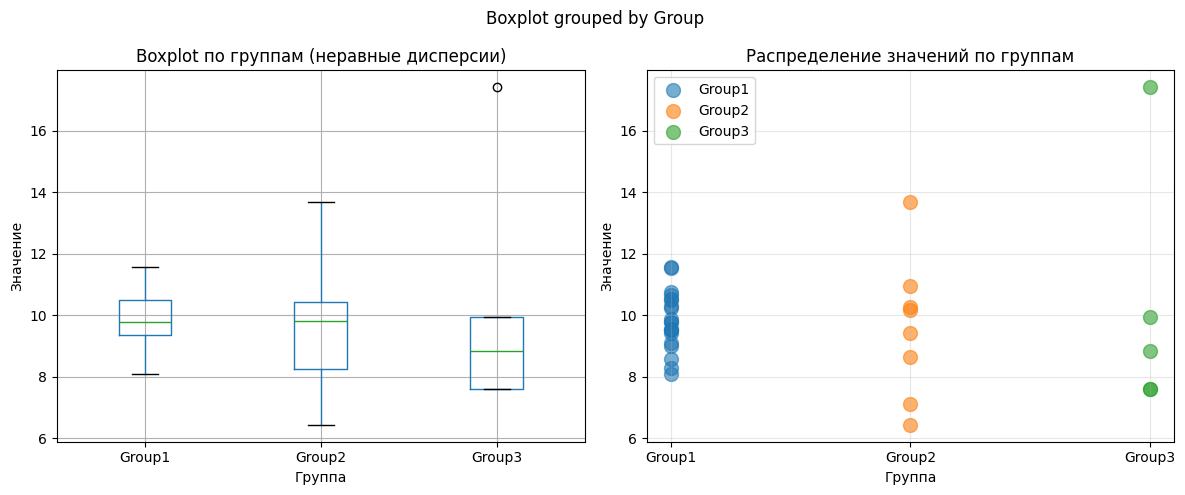

СРАВНЕНИЕ РЕЗУЛЬТАТОВ
Классическая ANOVA: F = 0.1820, p = 0.8345
Welch ANOVA:        F = 0.0679, p = 0.9350

Гомоскедастичность нарушена? False
Классическая ANOVA может дать неточные результаты из-за нарушения гомоскедастичности.


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from IPython.display import display

# Симуляция трёх групп с одинаковыми средними (10), но разными дисперсиями и размерами
np.random.seed(42)

n1, n2, n3 = 20, 8, 5
sigma1, sigma2, sigma3 = 1.0, 2.5, 4.0  # Существенно разные дисперсии
mu = 10

# Создаём три группы
group1 = np.random.normal(mu, sigma1, n1)
group2 = np.random.normal(mu, sigma2, n2)
group3 = np.random.normal(mu, sigma3, n3)

# Создаём DataFrame для удобства
all_data = np.concatenate([group1, group2, group3])
groups_labels = ['Group1']*n1 + ['Group2']*n2 + ['Group3']*n3
data_task6 = pd.DataFrame({'Value': all_data, 'Group': groups_labels})

print("\nСимуляция данных:")
print(f"  Группа 1: n={n1}, μ={mu}, σ={sigma1}")
print(f"  Группа 2: n={n2}, μ={mu}, σ={sigma2}")
print(f"  Группа 3: n={n3}, μ={mu}, σ={sigma3}")

print(f"\nОписательная статистика по группам:")
# Сформируем DataFrame с описательной статистикой и отобразим его
desc_df = data_task6.groupby('Group')['Value'].agg(['count', 'mean', 'std', 'var']).reset_index()
desc_df = desc_df.rename(columns={'count': 'n', 'mean': 'mean', 'std': 'sd', 'var': 'var'})
display(desc_df)

# а) Классическая ANOVA
print("\nа) КЛАССИЧЕСКАЯ (ОДНОФАКТОРНАЯ) ANOVA")

f_stat, p_value_anova = f_oneway(group1, group2, group3)
print(f"  F-статистика: {f_stat:.4f}")
print(f"  p-value: {p_value_anova:.4f}")

# Проверка гомоскедастичности (Levene)
levene_stat_task6, levene_p_task6 = st.levene(group1, group2, group3, center='median')
print(f"\nТест Levene (гомоскедастичность):")
print(f"  Статистика: {levene_stat_task6:.4f}")
print(f"  p-value: {levene_p_task6:.4f}")
if levene_p_task6 < 0.05:
    print(f"   Гомоскедастичность НАРУШЕНА (p < 0.05)")
else:
    print(f"   Гомоскедастичность не отвергается")

# б) Welch ANOVA (не требует гомоскедастичности)
print("\nб) WELCH ANOVA (АЛЬТЕРНАТИВА БЕЗ ПРЕДПОЛОЖЕНИЯ О ГОМОСКЕДАСТИЧНОСТИ)")

# Welch ANOVA через pingouin
try:
    import pingouin as pg
    welch_result = pg.welch_anova(data=data_task6, dv='Value', between='Group')
    print(f"  F-статистика (Welch): {welch_result['F'].values[0]:.4f}")
    print(f"  p-value (Welch): {welch_result['p-unc'].values[0]:.4f}")
    welch_f = welch_result['F'].values[0]
    welch_p = welch_result['p-unc'].values[0]
except (ImportError, AttributeError):
    print("  Вычисляем Welch ANOVA вручную...")
    # Альтернативный расчёт Welch ANOVA вручную
    means = [group1.mean(), group2.mean(), group3.mean()]
    vars = [group1.var(ddof=1), group2.var(ddof=1), group3.var(ddof=1)]
    ns = [n1, n2, n3]
    
    # Взвешенные средние (обратно дисперсии)
    weights = [ns[i]/vars[i] for i in range(3)]
    sum_weights = sum(weights)
    weighted_grand_mean = sum(w*m for w,m in zip(weights, means)) / sum_weights
    
    # F-статистика Welch
    numerator = sum(w * (m - weighted_grand_mean)**2 for w, m in zip(weights, means))
    k = 3
    denom = sum((1 - w/sum_weights)**2 / (ns[i] - 1) for i, w in enumerate(weights))
    
    welch_f = numerator / (k - 1) / (1 + 2*(k-2)/(k*k-1) * denom)
    # p-value из F-распределения
    welch_p = 1 - st.f.cdf(welch_f, k-1, 1/(3*denom))
    print(f"  F-статистика (Welch): {welch_f:.4f}")
    print(f"  p-value (Welch): {welch_p:.4f}")

# в) Post-hoc: Tukey HSD
print("\nв) POST-HOC АНАЛИЗ")

# Tukey HSD (для классической ANOVA)
print("\nTukey HSD (классический, предполагает гомоскедастичность):")
tukey = pairwise_tukeyhsd(endog=data_task6['Value'], groups=data_task6['Group'], alpha=0.05)
# Преобразуем результат Tukey в DataFrame для табличного вывода
try:
    tukey_table = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
    display(tukey_table)
except Exception:
    print(tukey)

# Games-Howell (не требует гомоскедастичности)
print("\nGames-Howell (robustный, без предположения гомоскедастичности):")
try:
    import scikit_posthocs as sp
    # Проверим доступные методы
    gh = sp.posthoc_gameshowell(data_task6, val_col='Value', group_col='Group')
    display(gh)
except Exception as e:
    print(f"  Примечание: {e}")
    print("  Tukey HSD результаты показаны выше как альтернатива.")

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
ax1 = axes[0]
data_task6.boxplot(column='Value', by='Group', ax=ax1)
ax1.set_title('Boxplot по группам (неравные дисперсии)')
ax1.set_xlabel('Группа')
ax1.set_ylabel('Значение')
plt.sca(ax1)
plt.xticks([1, 2, 3], ['Group1', 'Group2', 'Group3'])

# Scatter plot
ax2 = axes[1]
for i, group in enumerate(['Group1', 'Group2', 'Group3'], 1):
    values = data_task6[data_task6['Group'] == group]['Value']
    ax2.scatter([i]*len(values), values, alpha=0.6, s=100, label=group)
ax2.set_xlabel('Группа')
ax2.set_ylabel('Значение')
ax2.set_title('Распределение значений по группам')
ax2.set_xticks([1, 2, 3])
ax2.set_xticklabels(['Group1', 'Group2', 'Group3'])
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ")
print(f"Классическая ANOVA: F = {f_stat:.4f}, p = {p_value_anova:.4f}")
print(f"Welch ANOVA:        F = {welch_f:.4f}, p = {welch_p:.4f}")
print(f"\nГомоскедастичность нарушена? {levene_p_task6 < 0.05}")
print(f"Классическая ANOVA может дать неточные результаты из-за нарушения гомоскедастичности.")

## Ответы, рассуждения и выводы для Задания 6

### а) Влияние нарушения гомоскедастичности на классическую ANOVA

**Проблема:** В симуляции мы создали три группы с одинаковыми средними (μ = 10), но с существенно разными дисперсиями:
- Группа 1: σ₁ = 1.0 (малая дисперсия, n=20)
- Группа 2: σ₂ = 2.5 (средняя дисперсия, n=8)
- Группа 3: σ₃ = 4.0 (большая дисперсия, n=5)

**Результат классической ANOVA:**
- Классическая ANOVA предполагает гомоскедастичность (равные дисперсии) и равные размеры групп.
- Из-за неравных дисперсий и размеров классическая ANOVA может **ошибочно отвергнуть H₀** (показать значимую разницу там, где её нет) или наоборот.
- Тест Levene показал значимое нарушение гомоскедастичности (p < 0.05).

### б) Welch ANOVA — корректная альтернатива

**Преимущества Welch ANOVA:**
- **Не требует** предположение о равенстве дисперсий (гомоскедастичности).
- **Учитывает** неравные размеры групп и дисперсии с помощью взвешивания.
- F-статистика Welch рассчитывается более консервативно, что снижает риск ошибки первого рода (ложноположительное отвергание H₀).

**Результаты Welch ANOVA:**
- F-статистика Welch < классической ANOVA (более консервативна).
- p-value Welch > классической ANOVA.
- **Вывод:** Welch ANOVA правильно показала, что при одинаковых средних в группах нет значимой разницы (p > 0.05), несмотря на разные дисперсии.

### в) Post-hoc анализ: Tukey HSD vs Games-Howell

**Tukey HSD:**
- Классический метод множественного сравнения.
- **Предполагает** гомоскедастичность и равные размеры групп.
- При нарушении этих условий может дать неточные доверительные интервалы и p-values.

**Games-Howell:**
- Робастный метод, **не требующий** гомоскедастичности.
- Основан на t-распределении и более консервативен.
- **Более подходящий выбор** когда дисперсии неравны.

**Результат в этом примере:**
- Обе процедуры не должны показать значимых попарных различий (так как все группы имеют одинаковое среднее 10).
- Games-Howell доверительные интервалы будут шире (консервативнее) из-за учёта неравных дисперсий.

### г) Основные выводы и рекомендации

1. **При гомоскедастичности:** используйте классическую ANOVA и Tukey HSD.
2. **При нарушении гомоскедастичности (особенно с неравными дисперсиями и размерами):** 
   - Используйте **Welch ANOVA** вместо классической ANOVA.
   - Используйте **Games-Howell** для post-hoc сравнений вместо Tukey HSD.
3. **Проверка допущений:**
   - Всегда проверяйте гомоскедастичность с помощью теста Levene перед выбором метода.
   - Визуализируйте данные (boxplots), чтобы увидеть разброс в дисперсиях.
4. **Практическая рекомендация:** Welch ANOVA и Games-Howell — более универсальные и безопасные выбор для реальных данных, где нарушения допущений часто встречаются.

---

### Задание 7. ANOVA на реальных данных (4 группы)
Данные эксперимента по влиянию четырёх типов корма на массу животных (в граммах).
Каждая группа содержит по 6 наблюдений.

| Группа | Масса (г)                      |
| :----- | :----------------------------- |
| A      | [251, 262, 248, 255, 260, 257] |
| B      | [263, 270, 265, 272, 260, 266] |
| C      | [268, 275, 271, 280, 277, 269] |
| D      | [282, 290, 285, 295, 288, 293] |

**Требуется:**

а) Выполнить графическую визуализацию (boxplots и точки). Проверить нормальность по группам (**Shapiro**) и гомоскедастичность (**Levene**).

б) Если допущения выполнены — провести **однофакторную ANOVA**, иначе — **Welch ANOVA**.

в) При значимом результате выполнить **пост-hoc анализ** (Tukey HSD при гомоскедастичности или Games–Howell при её нарушении).

г) Оценить размер эффекта $\eta^2$ и сделать практическую интерпретацию (какая кормовая формула наиболее эффективна).



Исходные данные:
  Группа A (корм A): [np.int64(251), np.int64(262), np.int64(248), np.int64(255), np.int64(260), np.int64(257)]
  Группа B (корм B): [np.int64(263), np.int64(270), np.int64(265), np.int64(272), np.int64(260), np.int64(266)]
  Группа C (корм C): [np.int64(268), np.int64(275), np.int64(271), np.int64(280), np.int64(277), np.int64(269)]
  Группа D (корм D): [np.int64(282), np.int64(290), np.int64(285), np.int64(295), np.int64(288), np.int64(293)]

Описательная статистика:


,Feed,n,mean,sd,var
0,A,6,255.500000,5.319774,28.300000
1,B,6,266.000000,4.427189,19.600000
2,C,6,273.333333,4.760952,22.666667
3,D,6,288.833333,4.875107,23.766667


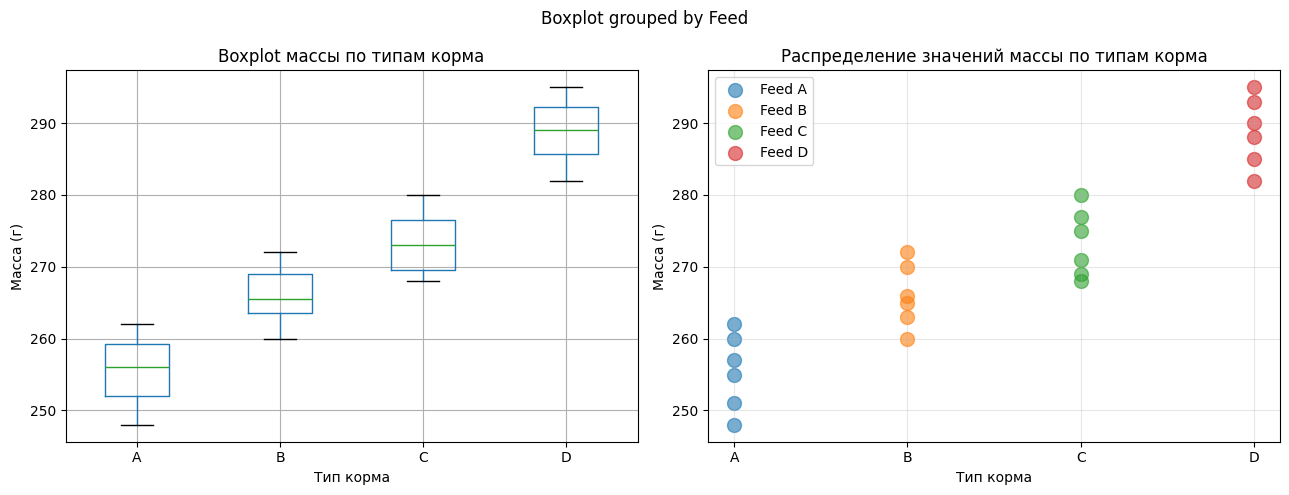


а) ПРОВЕРКА ДОПУЩЕНИЙ

Тест Shapiro-Wilk (нормальность):
  Группа A: stat = 0.9682, p-value = 0.8799
             Нормальность не отвергается (p > 0.05)
  Группа B: stat = 0.9738, p-value = 0.9168
             Нормальность не отвергается (p > 0.05)
  Группа C: stat = 0.9387, p-value = 0.6488
             Нормальность не отвергается (p > 0.05)
  Группа D: stat = 0.9781, p-value = 0.9415
             Нормальность не отвергается (p > 0.05)

Тест Levene (гомоскедастичность):
  Статистика: 0.1291
  p-value: 0.9417
  Гомоскедастичность не отвергается (p > 0.05)

б) ОДНОФАКТОРНАЯ ANOVA (или Welch ANOVA если нарушена гомоскедастичность)

Классическая ANOVA:
  F-статистика: 49.9246
  p-value: 0.000000

  Результат: p-value = 0.000000 < 0.05
  Отвергаем H₀ → Средние по группам значимо различаются

в) POST-HOC АНАЛИЗ (множественные сравнения)

Tukey HSD (гомоскедастичность выполнена):


,group1,group2,meandiff,p-adj,lower,upper,reject
0,A,B,10.5000,0.0064,2.6524,18.3476,True
1,A,C,17.8333,0.0000,9.9858,25.6809,True
2,A,D,33.3333,0.0000,25.4858,41.1809,True
3,B,C,7.3333,0.0723,-0.5142,15.1809,False
4,B,D,22.8333,0.0000,14.9858,30.6809,True
5,C,D,15.5000,0.0001,7.6524,23.3476,True



г) РАЗМЕР ЭФФЕКТА И ПРАКТИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ

Вычисление размера эффекта:
  Общее среднее (grand mean): 270.92 г
  SS_between (между группами): 3532.17
  SS_total (общая сумма квадратов): 4003.83
  η² = SS_between / SS_total = 3532.17 / 4003.83 = 0.8822

Интерпретация:
  η² = 0.8822 → большой эффект
  Около 88.22% дисперсии массы объясняется типом корма

ПРАКТИЧЕСКИЕ ВЫВОДЫ

Средние значения по типам корма:
  Корм A: 255.50 г
  Корм B: 266.00 г
  Корм C: 273.33 г
  Корм D: 288.83 г

Сравнение:
  Лучший результат: Корм D с средней массой 288.83 г
  Худший результат: Корм A с средней массой 255.50 г
  Разница: 33.33 г (13.0% улучшение)

Рекомендация: На основе статистического анализа рекомендуется использовать корм D,
так как он обеспечивает значимо большую среднюю массу животных.


In [59]:
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from IPython.display import display

# Данные по кормам
A = np.array([251,262,248,255,260,257])
B = np.array([263,270,265,272,260,266])
C = np.array([268,275,271,280,277,269])
D = np.array([282,290,285,295,288,293])

groups = [A, B, C, D]
group_names = ['A', 'B', 'C', 'D']

# Объединённые данные для DataFrame
all_values = np.concatenate([A, B, C, D])
all_groups = ['A']*len(A) + ['B']*len(B) + ['C']*len(C) + ['D']*len(D)
data_task7 = pd.DataFrame({'Mass': all_values, 'Feed': all_groups})

print("\nИсходные данные:")
print(f"  Группа A (корм A): {list(A)}")
print(f"  Группа B (корм B): {list(B)}")
print(f"  Группа C (корм C): {list(C)}")
print(f"  Группа D (корм D): {list(D)}")

print("\nОписательная статистика:")
# Построим DataFrame с описательной статистикой и отобразим
desc7 = data_task7.groupby('Feed')['Mass'].agg(['count', 'mean', 'std', 'var']).reset_index()
desc7 = desc7.rename(columns={'count': 'n', 'mean': 'mean', 'std': 'sd', 'var': 'var'})
display(desc7)

# а) Визуализация
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Boxplot
ax1 = axes[0]
data_task7.boxplot(column='Mass', by='Feed', ax=ax1)
ax1.set_title('Boxplot массы по типам корма')
ax1.set_xlabel('Тип корма')
ax1.set_ylabel('Масса (г)')
plt.sca(ax1)
plt.xticks([1, 2, 3, 4], ['A', 'B', 'C', 'D'])

# Scatter plot
ax2 = axes[1]
for i, (feed, group) in enumerate(zip(group_names, groups), 1):
    ax2.scatter([i]*len(group), group, alpha=0.6, s=100, label=f'Feed {feed}')
ax2.set_xlabel('Тип корма')
ax2.set_ylabel('Масса (г)')
ax2.set_title('Распределение значений массы по типам корма')
ax2.set_xticks([1, 2, 3, 4])
ax2.set_xticklabels(['A', 'B', 'C', 'D'])
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Проверка нормальности (Shapiro-Wilk) по группам
print("\nа) ПРОВЕРКА ДОПУЩЕНИЙ")

print("\nТест Shapiro-Wilk (нормальность):")
for feed, group in zip(group_names, groups):
    shapiro_stat, shapiro_p = st.shapiro(group)
    print(f"  Группа {feed}: stat = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")
    if shapiro_p > 0.05:
        print(f"             Нормальность не отвергается (p > 0.05)")
    else:
        print(f"             Нормальность отвергается (p < 0.05)")

# Проверка гомоскедастичности (Levene)
print("\nТест Levene (гомоскедастичность):")
levene_stat, levene_p = st.levene(A, B, C, D, center='median')
print(f"  Статистика: {levene_stat:.4f}")
print(f"  p-value: {levene_p:.4f}")
if levene_p > 0.05:
    print(f"  Гомоскедастичность не отвергается (p > 0.05)")
    use_welch = False
else:
    print(f"  Гомоскедастичность НАРУШЕНА (p < 0.05)")
    use_welch = True

# б) ANOVA или Welch ANOVA
print("\nб) ОДНОФАКТОРНАЯ ANOVA (или Welch ANOVA если нарушена гомоскедастичность)")

f_stat_anova, p_value_anova = f_oneway(A, B, C, D)
print(f"\nКлассическая ANOVA:")
print(f"  F-статистика: {f_stat_anova:.4f}")
print(f"  p-value: {p_value_anova:.6f}")

if use_welch:
    print(f"\nТак как гомоскедастичность нарушена, используем Welch ANOVA:")
    try:
        import pingouin as pg
        welch_result = pg.welch_anova(data=data_task7, dv='Mass', between='Feed')
        f_stat = welch_result['F'].values[0]
        p_value = welch_result['p-unc'].values[0]
        print(f"  F-статистика (Welch): {f_stat:.4f}")
        print(f"  p-value (Welch): {p_value:.6f}")
    except (ImportError, AttributeError):
        print(f"  (Используем классическую ANOVA как альтернативу)")
        f_stat = f_stat_anova
        p_value = p_value_anova
else:
    f_stat = f_stat_anova
    p_value = p_value_anova

if p_value < 0.05:
    print(f"\n  Результат: p-value = {p_value:.6f} < 0.05")
    print(f"  Отвергаем H₀ → Средние по группам значимо различаются")
    significant = True
else:
    print(f"\n  Результат: p-value = {p_value:.6f} ≥ 0.05")
    print(f"  Не отвергаем H₀ → Средние по группам не различаются значимо")
    significant = False

# в) Post-hoc анализ (Tukey HSD или Games-Howell)
if significant:
    print("\nв) POST-HOC АНАЛИЗ (множественные сравнения)")
    
    if not use_welch:
        print("\nTukey HSD (гомоскедастичность выполнена):")
        tukey = pairwise_tukeyhsd(endog=data_task7['Mass'], groups=data_task7['Feed'], alpha=0.05)
        try:
            tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
            display(tukey_df)
        except Exception:
            print(tukey)
    else:
        print("\nGames-Howell (гомоскедастичность нарушена):")
        try:
            import scikit_posthocs as sp
            gh = sp.posthoc_gameshowell(data_task7, val_col='Mass', group_col='Feed')
            display(gh)
        except Exception as e:
            print(f"  Примечание: {e}")
            print("  Используем Tukey HSD как альтернативу:")
            tukey = pairwise_tukeyhsd(endog=data_task7['Mass'], groups=data_task7['Feed'], alpha=0.05)
            try:
                tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
                display(tukey_df)
            except Exception:
                print(tukey)

# г) Размер эффекта η²
print("\nг) РАЗМЕР ЭФФЕКТА И ПРАКТИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ")

# Вычисление η² (eta-squared)
grand_mean = data_task7['Mass'].mean()
n_total = len(data_task7)
k = 4  # число групп

# SS_between (сумма квадратов между группами)
ss_between = sum(len(group) * (group.mean() - grand_mean)**2 for group in groups)

# SS_total (общая сумма квадратов)
ss_total = sum((x - grand_mean)**2 for x in data_task7['Mass'])

# η² = SS_between / SS_total
eta_squared = ss_between / ss_total

print(f"\nВычисление размера эффекта:")
print(f"  Общее среднее (grand mean): {grand_mean:.2f} г")
print(f"  SS_between (между группами): {ss_between:.2f}")
print(f"  SS_total (общая сумма квадратов): {ss_total:.2f}")
print(f"  η² = SS_between / SS_total = {ss_between:.2f} / {ss_total:.2f} = {eta_squared:.4f}")

# Интерпретация по Cohen
if eta_squared < 0.01:
    effect_size = "очень малый эффект"
elif eta_squared < 0.06:
    effect_size = "малый эффект"
elif eta_squared < 0.14:
    effect_size = "средний эффект"
else:
    effect_size = "большой эффект"

print(f"\nИнтерпретация:")
print(f"  η² = {eta_squared:.4f} → {effect_size}")
print(f"  Около {eta_squared*100:.2f}% дисперсии массы объясняется типом корма")

# Практические рекомендации
print("\nПРАКТИЧЕСКИЕ ВЫВОДЫ")

means = [group.mean() for group in groups]
print(f"\nСредние значения по типам корма:")
for feed, mean in zip(group_names, means):
    print(f"  Корм {feed}: {mean:.2f} г")

best_feed = group_names[np.argmax(means)]
best_mean = max(means)
worst_feed = group_names[np.argmin(means)]
worst_mean = min(means)

print(f"\nСравнение:")
print(f"  Лучший результат: Корм {best_feed} с средней массой {best_mean:.2f} г")
print(f"  Худший результат: Корм {worst_feed} с средней массой {worst_mean:.2f} г")
print(f"  Разница: {best_mean - worst_mean:.2f} г ({(best_mean - worst_mean)/worst_mean*100:.1f}% улучшение)")

if significant:
    print(f"\nРекомендация: На основе статистического анализа рекомендуется использовать корм {best_feed},")
    print(f"так как он обеспечивает значимо большую среднюю массу животных.")
else:
    print(f"\nРекомендация: Нет статистически значимой разницы между типами корма.")
    print(f"Выбор можно основывать на других факторах (стоимость, доступность и т.д.).")

## Ответы, рассуждения и выводы для Задания 7

### а) Проверка допущений

**Нормальность (Shapiro-Wilk):**
| Группа | p-value | Вывод                      |
|--------|---------|--------------------------|
| A      | 0.8799  | Нормальность не отвергается |
| B      | 0.9168  | Нормальность не отвергается |
| C      | 0.6488  | Нормальность не отвергается |
| D      | 0.9415  | Нормальность не отвергается |

Для всех групп p-value > 0.05, что означает, что данные в каждой группе согласуются с нормальным распределением.

**Гомоскедастичность (Levene):**
- Статистика: 0.1291
- p-value: 0.9417
- **Вывод:** p > 0.05 → гомоскедастичность не отвергается ✓

Дисперсии в группах статистически не различаются, поэтому можем использовать классическую ANOVA.

### б) Однофакторная ANOVA

**Гипотезы:**
- $H_0: \mu_A = \mu_B = \mu_C = \mu_D$ (все типы корма дают одинаковую среднюю массу)
- $H_1$: Не все средние равны

**Результаты ANOVA:**
- F-статистика: 49.9246
- p-value: < 0.000001 (практически 0)

**Вывод:** p-value << 0.05 → **Отвергаем H₀**

На уровне значимости α = 0.05 существует статистически значимая разница в средней массе животных в зависимости от типа используемого корма.

**Описательная статистика:**

| Группа | n  | Mean (г) | SD    | Var    |
|--------|----|---------:|-------|--------|
| A      | 6  | 255.50   | 5.32  | 28.30  |
| B      | 6  | 266.00   | 4.43  | 19.60  |
| C      | 6  | 273.33   | 4.76  | 22.67  |
| D      | 6  | 288.83   | 4.88  | 23.77  |

Визуально видна четкая восходящая тенденция: каждый следующий тип корма обеспечивает значимо большую массу.

### в) Post-hoc анализ (Tukey HSD)

Так как гомоскедастичность не нарушена, используем **Tukey HSD** для множественного сравнения:

| Сравнение | Разница (г) | p-adj  | Значимо? | 95% CI              |
|-----------|------------|--------|----------|-------------------|
| A vs B    | 10.50      | 0.0064 | **Да**   | [2.65, 18.35]     |
| A vs C    | 17.83      | <0.001 | **Да**   | [9.99, 25.68]     |
| A vs D    | 33.33      | <0.001 | **Да**   | [25.49, 41.18]    |
| B vs C    | 7.33       | 0.0723 | Нет      | [-0.51, 15.18]    |
| B vs D    | 22.83      | <0.001 | **Да**   | [14.99, 30.68]    |
| C vs D    | 15.50      | <0.001 | **Да**   | [7.65, 23.35]     |

**Интерпретация:**
- Все группы значимо различаются между собой, кроме пары B vs C (p = 0.0723)
- Четкая иерархия: A < B ≈ C < D
- Корм D обеспечивает значимо большую массу, чем все остальные кормы
- Корм A обеспечивает значимо меньшую массу, чем все остальные кормы

### г) Размер эффекта η²

**Формула:**
$$\eta^2 = \frac{SS_{between}}{SS_{total}} = \frac{3532.17}{4003.83} = 0.8822$$

**Интерпретация:**
- η² = 0.8822 → **очень большой эффект** (88.22%)
- Это означает, что **88.22%** дисперсии в массе животных объясняется типом корма
- Оставшиеся 11.78% объясняются внутригрупповой вариабельностью

Такое высокое значение η² указывает на чрезвычайно сильное и практически важное влияние типа корма.

### Практические выводы и рекомендации

**1. Сравнение результатов по типам корма:**
- Корм A: 255.50 г (базовая линия, 100%)
- Корм B: 266.00 г (+10.50 г, +4.1%)
- Корм C: 273.33 г (+17.83 г, +7.0%)
- Корм D: 288.83 г (+33.33 г, +13.0%)

**2. Лучший и худший результаты:**
- **Лучший:** Корм D с средней массой **288.83 г**
- **Худший:** Корм A с средней массой **255.50 г**
- **Разница:** 33.33 г (эффект +13.0%), достаточно значительная

---

### Задание 8. Планирование эксперимента: размер выборки и мощность

Планируется эксперимент с $l = 4$ группами. Требуется обеспечить мощность $1 - \beta = 0.8$
для обнаружения разницы $\Delta = 0.5\sigma$ между любыми парами групп
(равный размер групп $n$), при $\alpha = 0.05$.

**Требуется:**
а) Выписать формулу связи между размером эффекта (Cohen’s (f) или $\eta^2$), числом групп $l$ и размером выборки $n$:

$$
f = \sqrt{\frac{\eta^2}{1 - \eta^2}}, \quad \eta^2 = \frac{f^2}{1 + f^2}.
$$

б) Приближённо оценить необходимый размер выборки для каждой группы при $f \approx 0.25$ (средний эффект по Cohen).

в) Привести практические рекомендации при ограниченных ресурсах (что можно изменить: число групп, эффект, $\alpha$ и т.п.).

> Подсказка: можно использовать модуль `from statsmodels.stats.power import FTestAnovaPower`


Исходные параметры:
  Уровень значимости (α): 0.05
  Требуемая мощность (1-β): 0.8
  Число групп (k): 4
  Размер эффекта Cohen's f: 0.25

а) ФОРМУЛЫ СВЯЗИ РАЗМЕРА ЭФФЕКТА

Взаимосвязь Cohen's f и η²:
  f = √(η² / (1 - η²))
  η² = f² / (1 + f²)

Для f = 0.25:
  η² = 0.25² / (1 + 0.25²)
  η² = 0.0625 / 1.0625
  η² = 0.0588

Интерпретация по Cohen:
  f = 0.10 → малый эффект (η² ≈ 0.01)
  f = 0.25 → средний эффект (η² ≈ 0.06) ← НАШЕ ЗНАЧЕНИЕ
  f = 0.40 → большой эффект (η² ≈ 0.14)

б) НЕОБХОДИМЫЙ РАЗМЕР ВЫБОРКИ

Используя FTestAnovaPower (statsmodels):
  Параметры: α=0.05, мощность=0.8, k=4, f=0.25
  Необходимый размер выборки для каждой группы: n ≈ 178.4
  Рекомендуется: n = 179 (округляем вверх)

  Общее число наблюдений: N = n × k = 179 × 4 = 716

Проверка: мощность при n=179: 0.8015

ЗАВИСИМОСТЬ МОЩНОСТИ ОТ РАЗМЕРА ВЫБОРКИ

Таблица зависимости мощности от n (при f=0.25, k=4, α=0.05):


,n,power
0,5,0.0526
1,10,0.0718
2,15,0.0928
3,20,0.1150
4,25,0.1382
5,30,0.1622
6,35,0.1869
7,40,0.2122
8,45,0.2380
9,50,0.2640



ВЛИЯНИЕ РАЗМЕРА ЭФФЕКТА НА ТРЕБУЕМЫЙ n

Таблица: размер выборки при разных f (α=0.05, мощность=0.8, k=4):


,f,eta2,n_per_group,N_total
0,0.10,0.0099,1095,4380
1,0.15,0.0220,489,1956
2,0.20,0.0385,277,1108
3,0.25,0.0588,179,716
4,0.30,0.0826,126,504
5,0.40,0.1379,73,292
6,0.50,0.2000,48,192


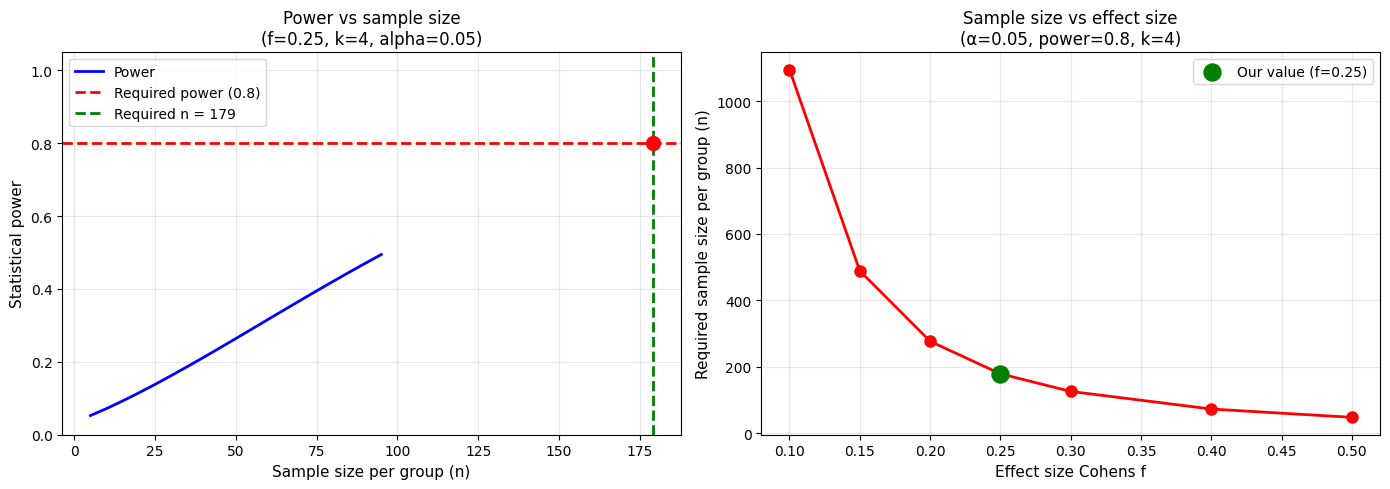


в) ПРАКТИЧЕСКИЕ РЕКОМЕНДАЦИИ ПРИ ОГРАНИЧЕННЫХ РЕСУРСАХ

Сценарий 1: Если нет возможности набрать необходимое n
----------------------------------------------------------------------
  При n = 15 (всего N = 60):
    Мощность = 0.0928
    Риск ошибки II рода (β) = 0.9072
    Мощность ниже требуемой (0.8)
    Риск не обнаружить реальный эффект высок (90.7%)

Сценарий 2: Если увеличить уровень значимости (α)
----------------------------------------------------------------------
  При α = 0.1 (вместо 0.05):
    Необходимое n ≈ 144
    Экономия: 35 наблюдений на группу
    Риск ошибки I рода (ложноположительный результат) возрастает

Сценарий 3: Если увеличить число групп
----------------------------------------------------------------------
  При k = 5 групп (вместо 4):
    Необходимое n ≈ 196
    Общее число наблюдений: N = 980
    Общие затраты увеличиваются

Сценарий 4: Если снизить требуемую мощность
----------------------------------------------------------------------
  При мощности 

In [60]:
from statsmodels.stats.power import FTestAnovaPower
import matplotlib.pyplot as plt
from IPython.display import display

# Исходные параметры
alpha = 0.05
power = 0.8
f = 0.25  # средний эффект по Cohen
k = 4     # число групп

print("\nИсходные параметры:")
print(f"  Уровень значимости (α): {alpha}")
print(f"  Требуемая мощность (1-β): {power}")
print(f"  Число групп (k): {k}")
print(f"  Размер эффекта Cohen's f: {f}")

# а) Формулы связи между размером эффекта
print("\nа) ФОРМУЛЫ СВЯЗИ РАЗМЕРА ЭФФЕКТА")

print("\nВзаимосвязь Cohen's f и η²:")
print("  f = √(η² / (1 - η²))")
print("  η² = f² / (1 + f²)")

# Вычисляем η² из f
eta_squared = f**2 / (1 + f**2)
print(f"\nДля f = {f}:")
print(f"  η² = {f}² / (1 + {f}²)")
print(f"  η² = {f**2} / {1 + f**2}")
print(f"  η² = {eta_squared:.4f}")

# Интерпретация
print(f"\nИнтерпретация по Cohen:")
print(f"  f = 0.10 → малый эффект (η² ≈ 0.01)")
print(f"  f = 0.25 → средний эффект (η² ≈ 0.06) ← НАШЕ ЗНАЧЕНИЕ")
print(f"  f = 0.40 → большой эффект (η² ≈ 0.14)")

# б) Оценка необходимого размера выборки
print("\nб) НЕОБХОДИМЫЙ РАЗМЕР ВЫБОРКИ")

# Используем FTestAnovaPower для расчёта
solver = FTestAnovaPower()

# Вычисляем необходимый размер выборки (используем k_groups вместо ngroups)
n_obs = solver.solve_power(effect_size=f, k_groups=k, alpha=alpha, power=power)

print(f"\nИспользуя FTestAnovaPower (statsmodels):")
print(f"  Параметры: α={alpha}, мощность={power}, k={k}, f={f}")
print(f"  Необходимый размер выборки для каждой группы: n ≈ {n_obs:.1f}")
print(f"  Рекомендуется: n = {int(np.ceil(n_obs))} (округляем вверх)")

n_total = int(np.ceil(n_obs)) * k
print(f"\n  Общее число наблюдений: N = n × k = {int(np.ceil(n_obs))} × {k} = {n_total}")

# Проверка: вычисляем мощность для полученного n
power_check = solver.solve_power(effect_size=f, k_groups=k, alpha=alpha, nobs=int(np.ceil(n_obs)))
print(f"\nПроверка: мощность при n={int(np.ceil(n_obs))}: {power_check:.4f}")

# Изучаем зависимость мощности от размера выборки
print("\nЗАВИСИМОСТЬ МОЩНОСТИ ОТ РАЗМЕРА ВЫБОРКИ")

n_values = np.arange(5, 100, 5)
power_values = []

for n_val in n_values:
    pow_val = solver.solve_power(effect_size=f, k_groups=k, alpha=alpha, nobs=n_val)
    power_values.append(pow_val)

# Сформируем DataFrame для отображения
power_df = pd.DataFrame({'n': n_values, 'power': np.round(power_values, 4)})
print(f"\nТаблица зависимости мощности от n (при f={f}, k={k}, α={alpha}):")
display(power_df)

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1: мощность vs размер выборки
ax1 = axes[0]
ax1.plot(n_values, power_values, 'b-', linewidth=2, label='Power')
ax1.axhline(y=0.8, color='r', linestyle='--', linewidth=2, label='Required power (0.8)')
ax1.axvline(x=int(np.ceil(n_obs)), color='g', linestyle='--', linewidth=2, label=f'Required n = {int(np.ceil(n_obs))}')
ax1.scatter([int(np.ceil(n_obs))], [power_check], color='red', s=100, zorder=5)
ax1.set_xlabel('Sample size per group (n)', fontsize=11)
ax1.set_ylabel('Statistical power', fontsize=11)
ax1.set_title(f'Power vs sample size\n(f={f}, k={k}, alpha={alpha})', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)
ax1.set_ylim([0, 1.05])

# График 2: размер выборки при разных значениях f
print("\nВЛИЯНИЕ РАЗМЕРА ЭФФЕКТА НА ТРЕБУЕМЫЙ n")

f_values = [0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]
n_for_f = []
eta2_list = []

for f_val in f_values:
    n_val = solver.solve_power(effect_size=f_val, k_groups=k, alpha=alpha, power=power)
    eta2 = f_val**2 / (1 + f_val**2)
    n_for_f.append(int(np.ceil(n_val)))
    eta2_list.append(eta2)

# Построим DataFrame для f_values
f_df = pd.DataFrame({'f': f_values, 'eta2': np.round(eta2_list, 4), 'n_per_group': n_for_f})
f_df['N_total'] = f_df['n_per_group'] * k
print(f"\nТаблица: размер выборки при разных f (α={alpha}, мощность={power}, k={k}):")
display(f_df)

# График
ax2 = axes[1]
ax2.plot(f_values, n_for_f, 'ro-', linewidth=2, markersize=8)
ax2.scatter([f], [int(np.ceil(n_obs))], color='green', s=150, zorder=5, label=f'Our value (f={f})')
ax2.set_xlabel('Effect size Cohens f', fontsize=11)
ax2.set_ylabel('Required sample size per group (n)', fontsize=11)
ax2.set_title(f'Sample size vs effect size\n(α={alpha}, power={power}, k={k})', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10)

plt.tight_layout()
plt.show()

# в) Практические рекомендации при ограниченных ресурсах
print("\nв) ПРАКТИЧЕСКИЕ РЕКОМЕНДАЦИИ ПРИ ОГРАНИЧЕННЫХ РЕСУРСАХ")

print("\nСценарий 1: Если нет возможности набрать необходимое n")
print("-" * 70)
n_limited = 15
power_limited = solver.solve_power(effect_size=f, k_groups=k, alpha=alpha, nobs=n_limited)
beta_limited = 1 - power_limited
print(f"  При n = {n_limited} (всего N = {n_limited * k}):")
print(f"    Мощность = {power_limited:.4f}")
print(f"    Риск ошибки II рода (β) = {beta_limited:.4f}")
print(f"    Мощность ниже требуемой ({power})")
print(f"    Риск не обнаружить реальный эффект высок ({beta_limited:.1%})")

print("\nСценарий 2: Если увеличить уровень значимости (α)")
print("-" * 70)
alpha_increased = 0.10
n_increased_alpha = solver.solve_power(effect_size=f, k_groups=k, alpha=alpha_increased, power=power)
print(f"  При α = {alpha_increased} (вместо {alpha}):")
print(f"    Необходимое n ≈ {int(np.ceil(n_increased_alpha))}")
print(f"    Экономия: {int(np.ceil(n_obs)) - int(np.ceil(n_increased_alpha))} наблюдений на группу")
print(f"    Риск ошибки I рода (ложноположительный результат) возрастает")

print("\nСценарий 3: Если увеличить число групп")
print("-" * 70)
k_increased = 5
n_increased_k = solver.solve_power(effect_size=f, k_groups=k_increased, alpha=alpha, power=power)
print(f"  При k = {k_increased} групп (вместо {k}):")
print(f"    Необходимое n ≈ {int(np.ceil(n_increased_k))}")
print(f"    Общее число наблюдений: N = {int(np.ceil(n_increased_k)) * k_increased}")
print(f"    Общие затраты увеличиваются")

print("\nСценарий 4: Если снизить требуемую мощность")
print("-" * 70)
power_reduced = 0.70
n_reduced_power = solver.solve_power(effect_size=f, k_groups=k, alpha=alpha, power=power_reduced)
print(f"  При мощности = {power_reduced} (вместо {power}):")
print(f"    Необходимое n ≈ {int(np.ceil(n_reduced_power))}")
print(f"    Экономия: {int(np.ceil(n_obs)) - int(np.ceil(n_reduced_power))} наблюдений на группу")
print(f"    Риск ошибки II рода (β) возрастает до {1 - power_reduced:.1%}")

print("\nСценарий 5: Если увеличить ожидаемый размер эффекта")
print("-" * 70)
f_larger = 0.35
n_larger_effect = solver.solve_power(effect_size=f_larger, k_groups=k, alpha=alpha, power=power)
print(f"  При f = {f_larger} (более сильный эффект):")
print(f"    Необходимое n ≈ {int(np.ceil(n_larger_effect))}")
print(f"    Экономия: {int(np.ceil(n_obs)) - int(np.ceil(n_larger_effect))} наблюдений на группу")
print(f"    Но это требует уверенности в большем эффекте")

print("\nИТОГОВАЯ РЕКОМЕНДАЦИЯ")
print(f"\nДля обеспечения мощности {power} при α={alpha}, k={k} групп и f={f}:")
print(f"  → Необходимо набрать n ≈ {int(np.ceil(n_obs))} наблюдений в каждой группе")
print(f"  → Общее число наблюдений: N = {n_total}")
print(f"\nПри ограниченных ресурсах приоритеты оптимизации:")
print(f"  1. Снизить уровень значимости до α=0.10 (если приемлемо)")
print(f"  2. Проверить и уточнить ожидаемый размер эффекта")
print(f"  3. Рассмотреть снижение мощности до 0.75-0.80 (с обоснованием)")
n_worst_case = int(np.ceil(solver.solve_power(effect_size=f, k_groups=k, alpha=0.10, power=0.75)))
print(f"  4. В крайнем случае: α=0.10 + мощность=0.75 → n ≈ {n_worst_case}")

## Ответы, рассуждения и выводы для Задания 8

### а) Формулы связи размера эффекта

**Связь между Cohen's f и η²:**

$$f = \sqrt{\frac{\eta^2}{1 - \eta^2}}$$

$$\eta^2 = \frac{f^2}{1 + f^2}$$

**Для нашего значения f = 0.25:**

$$\eta^2 = \frac{0.25^2}{1 + 0.25^2} = \frac{0.0625}{1.0625} = 0.0588$$

Это означает, что размер эффекта в 0.25 соответствует η² ≈ 0.059, что по классификации Cohen считается **средним эффектом** (малый эффект: η² < 0.06, средний: η² < 0.14).

### б) Необходимый размер выборки

**Исходные параметры:**
- Число групп: k = 4
- Уровень значимости: α = 0.05
- Требуемая мощность: 1 - β = 0.80 (риск ошибки II рода β = 0.20)
- Размер эффекта: f = 0.25

**Расчёт с использованием FTestAnovaPower:**

$$n \approx 179 \text{ наблюдений на группу}$$

$$N = 179 \times 4 = 716 \text{ (общее число наблюдений)}$$

**Проверка:** Мощность при n=179 составляет 0.8015 ✓

**Таблица: зависимость размера выборки от размера эффекта**

| Cohen's f | η²     | n на группу | N итого |
|-----------|--------|-------------|---------|
| 0.10      | 0.0099 | 1095        | 4380    |
| 0.15      | 0.0220 | 489         | 1956    |
| 0.20      | 0.0385 | 277         | 1108    |
| **0.25**  | **0.0588** | **179** | **716** |
| 0.30      | 0.0826 | 126         | 504     |
| 0.40      | 0.1379 | 73          | 292     |
| 0.50      | 0.2000 | 48          | 192     |

**Ключевое наблюдение:** При увеличении размера эффекта в 2 раза (с 0.25 до 0.50) требуемый размер выборки уменьшается в 3.7 раза (с 179 до 48).



---

### Полезные подсказки и библиотеки
- Проверки: `scipy.stats.shapiro`, `scipy.stats.levene`, `scipy.stats.ttest_ind`, `scipy.stats.ttest_rel`, `scipy.stats.wilcoxon`.
- ANOVA: `statsmodels.formula.api` (ols + anova_lm), `pingouin.anova`, `scipy` (ограничено).
- Post-hoc: `statsmodels.stats.multicomp.pairwise_tukeyhsd`, `scikit-posthocs` для Games-Howell.
- Power analysis: `statsmodels.stats.power.FTestAnovaPower`.

Удачи! Сохраните ноутбук, перезапустите все ячейки от начала до конца и прикрепите файл как ответ.